In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.ndimage

In [74]:
# initialization
#34626
np.random.seed(212) #34354  #25984839
len_traj = 300
delta_t = 0.1
num_traj = 5
#acc = np.random.uniform(low=-10, high=10, size=(2,len_traj))

acc = np.random.choice([-10,0,10], size=(2,len_traj))
acc = np.tile(acc, (num_traj, 1, 1))       # (num_traj,2,len_traj)
acc = acc.reshape((2,len_traj, num_traj))  # (2,len_traj, num_traj)
vel = np.zeros((2,len_traj, num_traj))
pos = np.zeros((2,len_traj, num_traj))


# compute velocity and position for generating trajectories
for t in range(1,len_traj):
    vel[:, t, 0] = vel[:,t-1, 0] + acc[:, t, 0] * delta_t
    pos[:, t, 0] = (pos[:, t-1, 0] + vel[:, t, 0] * delta_t) 
    
    
# noise for simulating noisy trajectories
noise = np.zeros((2, len_traj, num_traj))
for j in range(1, num_traj):
    for k in range(len_traj):
        noise[0,k,j] = np.random.normal(loc=pos[0, k, 0], scale=4, size=(1,1))
        noise[1,k,j] = np.random.normal(loc=pos[1, k, 0], scale=4, size=(1,1))
    
    
    
#noise = scipy.ndimage.filters.gaussian_filter1d(noise, sigma=1) 

# #add noise to position    
# for i in range(1,num_traj):    
#     pos[0, :, i] = noise[0, :, i] 
#     pos[1, :, i] = noise[1, :, i]
    

#compute the running mean for position for smoothing trajectories    
for i in range(1,num_traj):  
    for k in range(len_traj):
        if k == 0 or k==len_traj-1:
            pos[0, k, i] = noise[0, k, i] 
            pos[1, k, i] = noise[1, k, i] 
        else:    
            pos[0, k, i] = np.mean(noise[0, k-1:k+2, i]) 
            pos[1, k, i] = np.mean(noise[1, k-1:k+2, i])
            

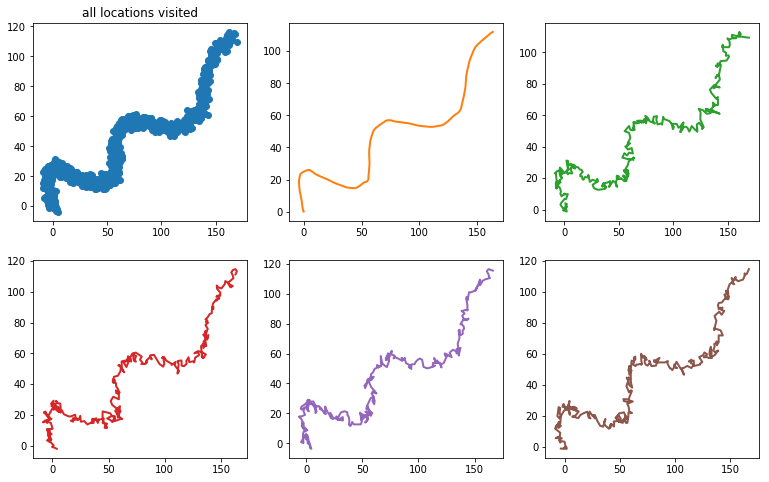

In [75]:
# plot the trajectories 
plt.figure(figsize=(13,8))
plt.subplot(231)
plt.scatter(pos[0,:,:], pos[1,:,:])
plt.title("all locations visited")

x = pos[0,:,:]
y = pos[1,:,:]
plt.subplot(232)
plt.plot(x[:,0], y[:,0], 'C1', lw=2)

#plt.scatter(x[:,0], y[:,0], s=40)
plt.subplot(233)
plt.plot(x[:,1], y[:,1], 'C2', lw=2)
#plt.scatter(x[:,1], y[:,1], s=40)
plt.subplot(234)
plt.plot(x[:,2], y[:,2], 'C3', lw=2)
#plt.scatter(x[:,2], y[:,2], s=40)
plt.subplot(235)
plt.plot(x[:,3], y[:,3], 'C4', lw=2)
#plt.scatter(x[:,3], y[:,3], s=40)
plt.subplot(236)
plt.plot(x[:,4], y[:,4], 'C5', lw=2)
#plt.scatter(x[:,4], y[:,4], s=40)

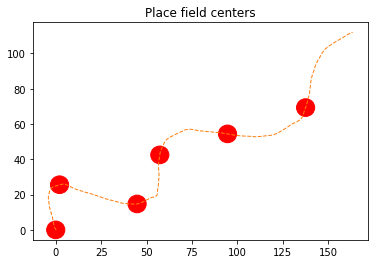

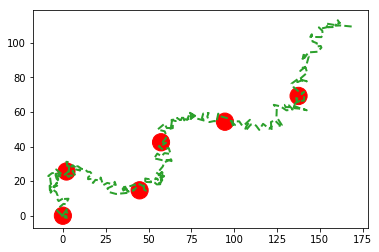

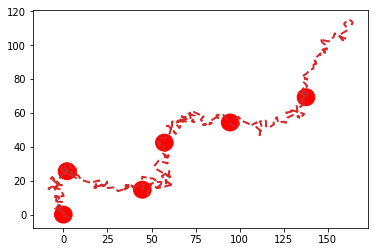

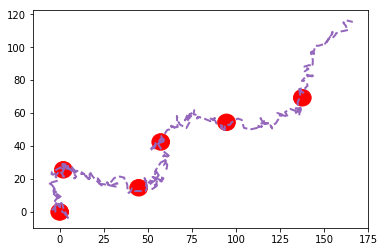

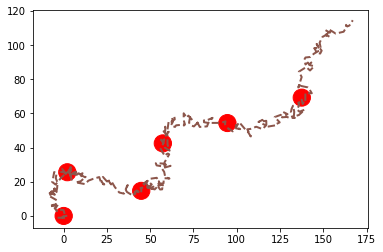

In [94]:
# Position the place fields
num_fields = 6   # number of place fields or number of place cells
np.random.seed(40) #25768

# choose random points on the trajectory to place the fields
# grid field
idx = [0, 50, 2*50, 3*50, 4*50, 5*50]

#idx = np.random.randint(low=0, high=len_traj, size=num_fields)
field_pos = pos[:,idx,0] # field positions

sigma = 5  # std dev of place field gaussian
plt.figure()
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.title("Place field centers")
plt.plot(x[:,0], y[:,0], 'C1--', lw=1)

for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)
    
plt.figure()
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.plot(x[:,1], y[:,1], 'C2--', lw=2)

for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)
    
plt.figure()
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.plot(x[:,2], y[:,2], 'C3--', lw=2)

for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)
    
plt.figure()
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.plot(x[:,3], y[:,3], 'C4--', lw=2)

for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)
    
plt.figure()
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.plot(x[:,4], y[:,4], 'C5--', lw=2)


for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)

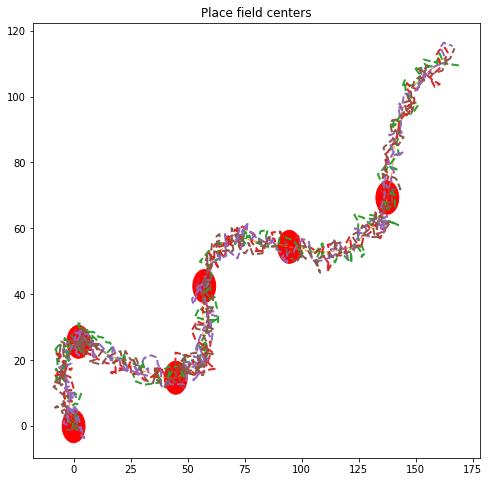

In [95]:
plt.figure(figsize=(8,8))
plt.scatter(field_pos[0,:], field_pos[1,:], c='r')
plt.title("Place field centers")
plt.plot(x[:,0], y[:,0], 'C1--', lw=1)


plt.plot(x[:,1], y[:,1], 'C2--', lw=2)
plt.plot(x[:,2], y[:,2], 'C3--', lw=2)
plt.plot(x[:,3], y[:,3], 'C4--', lw=2)
plt.plot(x[:,4], y[:,4], 'C5--', lw=2)

sigma = 5  # std dev of place field gaussian
for i in range(num_fields):
    circle1=plt.Circle(field_pos[:,i], radius=sigma, color='r')
    plt.gcf().gca().add_artist(circle1)

In [96]:
# Compute activations for all trajectories using a 2D Gaussian to get a circular field.
nx_actvatn = np.zeros((num_fields, len_traj, num_traj))
ny_actvatn = np.zeros((num_fields, len_traj, num_traj))


for i in range(num_fields):
    nx_actvatn[i, :, :] = (1/(np.sqrt(2*np.pi)*sigma)) * ( np.exp(-np.power((pos[0,:,:] - field_pos[0,i]),2)) / (2*np.power(sigma,2)) )
    ny_actvatn[i, :, :] = (1/(np.sqrt(2*np.pi)*sigma)) * ( np.exp(-np.power((pos[1,:,:] - field_pos[1,i]),2)) / (2*np.power(sigma,2)) )
    
N_actvatn = nx_actvatn * ny_actvatn

# average the activations of all neurons to consider them as a single neuron
firing_rate = np.mean(N_actvatn, axis=0)

In [97]:
def autocorr(x, y):
    result = np.correlate(x, y, mode='full')
    # using floor ensures that there are 300 elements in result
    return result[int(np.floor(result.size/2)):]

Text(0, 0.5, 'Activation')

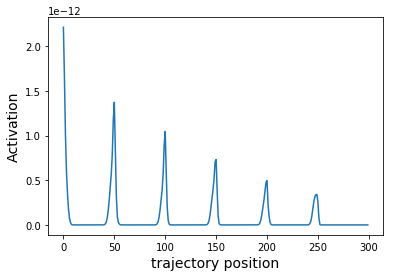

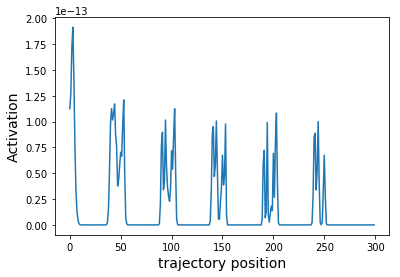

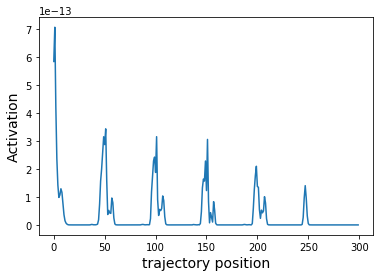

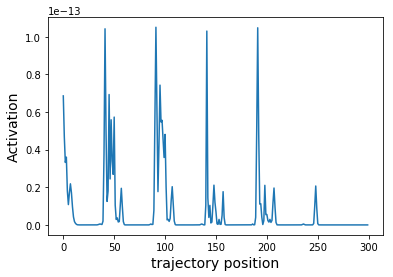

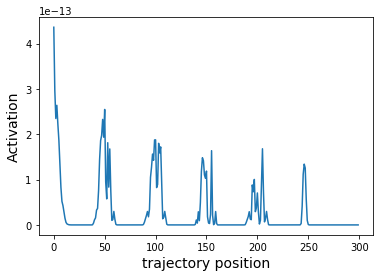

In [98]:
# compute the autocorrelation
corr = autocorr(firing_rate[:,0], firing_rate[:,0]) 
plt.figure()
plt.plot(corr)
plt.xlabel("trajectory position", fontsize=14)
plt.ylabel("Activation", fontsize=14)

corr = autocorr(firing_rate[:,0], firing_rate[:,1]) 
plt.figure()
plt.plot(corr)
plt.xlabel("trajectory position", fontsize=14)
plt.ylabel("Activation", fontsize=14)

corr = autocorr(firing_rate[:,0], firing_rate[:,2]) 
plt.figure()
plt.plot(corr)
plt.xlabel("trajectory position", fontsize=14)
plt.ylabel("Activation", fontsize=14)

corr = autocorr(firing_rate[:,0], firing_rate[:,3]) 
plt.figure()
plt.plot(corr)
plt.xlabel("trajectory position", fontsize=14)
plt.ylabel("Activation", fontsize=14)

corr = autocorr(firing_rate[:,0], firing_rate[:,4]) 
plt.figure()
plt.plot(corr)
plt.xlabel("trajectory position", fontsize=14)
plt.ylabel("Activation", fontsize=14)

# corr = autocorr(firing_rate[:,1], firing_rate[:,2]) 
# plt.figure()
# plt.plot(corr)

# corr = autocorr(firing_rate[:,2], firing_rate[:,3]) 
# plt.figure()
# plt.plot(corr)

# corr = autocorr(firing_rate[:,3], firing_rate[:,4]) 
# plt.figure()
# plt.plot(corr)

# corr = autocorr(firing_rate[:,1], firing_rate[:,4]) 
# plt.figure()
# plt.plot(corr)

In [14]:
# reference for Gaussian densitites
# http://cs229.stanford.edu/section/gaussians.pdf